In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns
import os 

In [2]:
basepath='.'
l1=[]
def loaddata(service_prov,folder):
    subfolder=os.path.join(basepath,service_prov,folder)
    print(subfolder)
    for file in os.listdir(subfolder):
        filedf=pd.read_csv(os.path.join(subfolder,file))
        l1.append(filedf)
    dflist=pd.concat(l1)
    return dflist
    

In [3]:
df_enexis_elect=loaddata('enexis','electricity')


.\enexis\electricity


In [4]:
df_enexis_elect=loaddata('enexis','electricity')
df_enexis_elect['serv_prov']='Enexis'
df_enexis_gas=loaddata('enexis','gas')
df_enexis_gas['serv_prov']='Enexis'
df_stedin_elect=loaddata('stedin','electricity')
df_stedin_elect['serv_prov']='Stedin'
df_stedin_gas=loaddata('stedin','gas')
df_stedin_gas['serv_prov']='Stedin'
df_liander_elect=loaddata('liander','electricity')
df_liander_elect['serv_prov']='Liander'
df_liander_gas=loaddata('liander','gas')
df_liander_gas['serv_prov']='Liander'


.\enexis\electricity
.\enexis\gas
.\stedin\electricity
.\stedin\gas
.\liander\electricity
.\liander\gas


In [5]:
df_stedin_elect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3953243 entries, 0 to 84694
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   net_manager                   object 
 1   purchase_area                 object 
 2   street                        object 
 3   zipcode_from                  object 
 4   zipcode_to                    object 
 5   city                          object 
 6   delivery_perc                 float64
 7   num_connections               int64  
 8   perc_of_active_connections    float64
 9   type_conn_perc                float64
 10  type_of_connection            object 
 11  annual_consume                float64
 12  annual_consume_lowtarif_perc  float64
 13  smartmeter_perc               float64
 14  serv_prov                     object 
dtypes: float64(6), int64(1), object(8)
memory usage: 482.6+ MB


In [6]:
df_stedin_elect.describe()

,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
count,3.952079e+06,3.953243e+06,3.953243e+06,3.655253e+06,3.953243e+06,3.953243e+06,3.113696e+06
mean,9.732618e+01,2.234824e+01,9.952359e+01,7.640402e+01,4.028000e+03,3.789430e+01,2.071448e+01
std,7.169151e+00,1.349140e+01,3.563017e+00,2.013057e+01,3.397551e+03,3.088516e+01,3.028021e+01
min,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+02,1.500000e+01,1.000000e+02,5.900000e+01,2.299000e+03,9.000000e+00,0.000000e+00
50%,1.000000e+02,2.000000e+01,1.000000e+02,8.000000e+01,3.257000e+03,3.700000e+01,6.000000e+00
75%,1.000000e+02,2.500000e+01,1.000000e+02,9.500000e+01,4.374000e+03,5.336000e+01,2.500000e+01
max,1.000000e+02,1.146000e+03,1.000000e+02,1.000000e+02,1.108570e+05,2.225000e+03,1.000000e+02


## City wise consumption of energy -Electricity

Text(0.5, 0, 'City')

<Figure size 576x288 with 0 Axes>

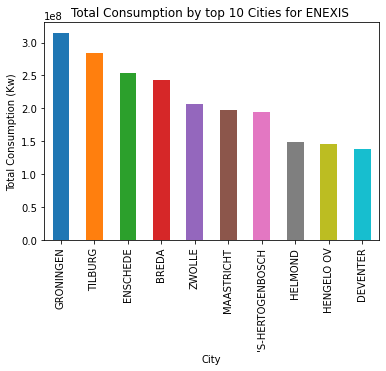

In [7]:
plt.figure(figsize=(8,4))
plt.subplots()
df_enexis_city=df_enexis_elect.groupby('city').sum()['annual_consume'].sort_values(ascending=False).head(10)
df_enexis_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)

plt.title("Total Consumption by top 10 Cities for ENEXIS ")
plt.ylabel('Total Consumption (Kw)')
plt.xlabel('City')

In [8]:
df_liander_elect

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,serv_prov
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100.00,16.0,100.00,NaN,NaN,4282.0,25.00,0.00,Liander
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100.00,11.0,100.00,NaN,NaN,5113.0,10.00,0.00,Liander
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100.00,30.0,100.00,NaN,NaN,4809.0,34.00,0.00,Liander
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100.00,21.0,100.00,NaN,NaN,5015.0,44.00,0.00,Liander
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100.00,12.0,100.00,NaN,NaN,3074.0,22.00,0.00,Liander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143126,Liander NB,LIANDER,De Lauwers,9873RV,9873RV,GERKESKLOOSTER,91.67,48.0,97.92,100.0,1x25,2992.0,72.92,29.17,Liander
143127,Liander NB,LIANDER,De Lauwers,9873RW,9873RW,GERKESKLOOSTER,90.00,10.0,100.00,100.0,3x25,3348.0,60.00,0.00,Liander
143128,Liander NB,LIANDER,Izermieden,9873TA,9873TG,GERKESKLOOSTER,92.31,26.0,88.46,100.0,3x25,9606.0,73.08,15.38,Liander
143129,Liander NB,LIANDER,Sarabos,9873TH,9873TH,GERKESKLOOSTER,72.73,11.0,72.73,100.0,3x25,12344.0,72.73,36.36,Liander


Text(0.5, 0, 'City')

<Figure size 576x432 with 0 Axes>

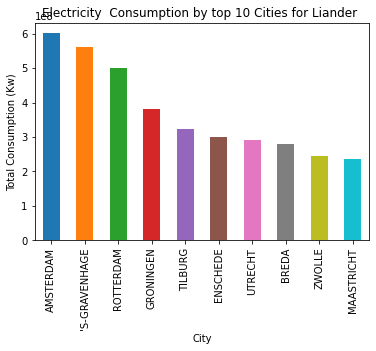

In [9]:
plt.figure(figsize=(8,6))
plt.subplots()
df_liander_city=df_liander_elect.groupby('city').sum()['annual_consume'].sort_values(ascending=False).head(10)
df_liander_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("Electricity  Consumption by top 10 Cities for Liander ")
plt.ylabel('Total Consumption (Kw)')
plt.xlabel('City')

Text(0.5, 0, 'City')

<Figure size 720x576 with 0 Axes>

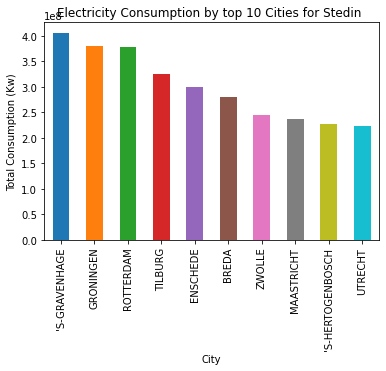

In [10]:
plt.figure(figsize=(10,8))
plt.subplots()
df_stedin_city=df_stedin_elect.groupby('city').sum()['annual_consume'].sort_values(ascending=False).head(10)
df_stedin_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("Electricity Consumption by top 10 Cities for Stedin ")
plt.ylabel('Total Consumption (Kw)')
plt.xlabel('City')

Text(0.5, 0, 'City')

<Figure size 720x720 with 0 Axes>

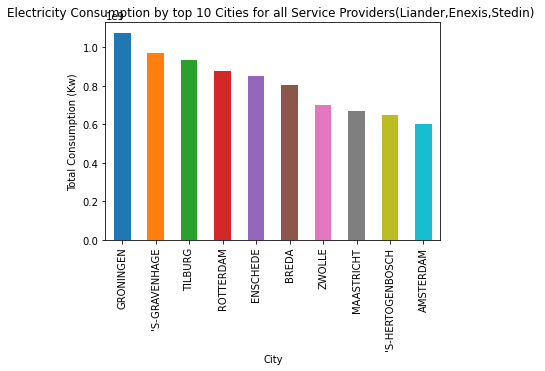

In [11]:
l2=[]
l2.append(df_liander_elect)
l2.append(df_stedin_elect)
l2.append(df_enexis_elect)

plt.figure(figsize=(10,10)) 
plt.subplots()
df_electricity_all=pd.concat(l2)
df_all_city=df_electricity_all.groupby('city').sum()['annual_consume'].sort_values(ascending=False).head(10)
df_all_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("Electricity Consumption by top 10 Cities for all Service Providers(Liander,Enexis,Stedin) ")
plt.ylabel('Total Consumption (Kw)')
plt.xlabel('City')

In [12]:
df_all_city

city
GRONINGEN           1.075673e+09
'S-GRAVENHAGE       9.679726e+08
TILBURG             9.327601e+08
ROTTERDAM           8.774716e+08
ENSCHEDE            8.502839e+08
BREDA               8.028969e+08
ZWOLLE              6.977180e+08
MAASTRICHT          6.697545e+08
'S-HERTOGENBOSCH    6.491556e+08
AMSTERDAM           6.011560e+08
Name: annual_consume, dtype: float64

## City wise consumption of energy - Gas

Text(0.5, 0, 'City')

<Figure size 576x432 with 0 Axes>

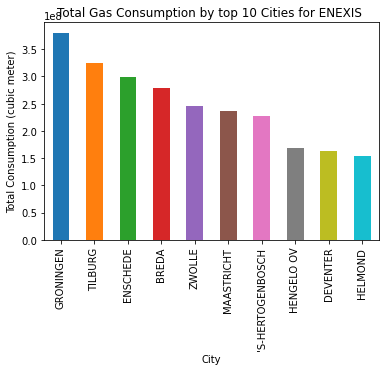

In [13]:
plt.figure(figsize=(8,6))
plt.subplots()
df_enexis_gas_city=df_enexis_gas.groupby('city').sum()['annual_consume'].sort_values(ascending=False).head(10)
df_enexis_gas_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("Total Gas Consumption by top 10 Cities for ENEXIS ")
plt.ylabel('Total Consumption (cubic meter)')
plt.xlabel('City')

In [14]:
df_enexis_gas_city

city
GRONINGEN           3.803961e+08
TILBURG             3.241485e+08
ENSCHEDE            2.986180e+08
BREDA               2.796366e+08
ZWOLLE              2.453125e+08
MAASTRICHT          2.361641e+08
'S-HERTOGENBOSCH    2.273363e+08
HENGELO OV          1.690050e+08
DEVENTER            1.625526e+08
HELMOND             1.534076e+08
Name: annual_consume, dtype: float64

Text(0.5, 0, 'City')

<Figure size 720x576 with 0 Axes>

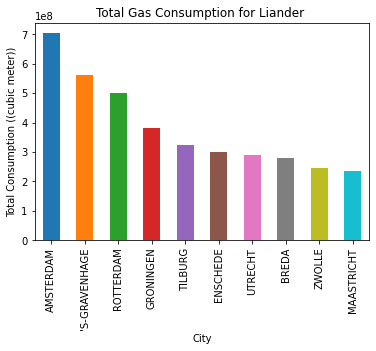

In [15]:
plt.figure(figsize=(10,8))
plt.subplots()
df_liander_gas_city=df_liander_gas.groupby('city').sum()['annual_consume'].sort_values(ascending=False).head(10)
df_liander_gas_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("Total Gas Consumption for Liander ")
plt.ylabel('Total Consumption ((cubic meter))')
plt.xlabel('City')

Text(0.5, 0, 'City')

<Figure size 720x576 with 0 Axes>

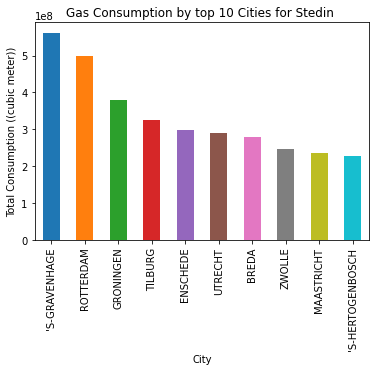

In [16]:
plt.figure(figsize=(10,8))
plt.subplots()
df_stedin_gas_city=df_stedin_gas.groupby('city').sum()['annual_consume'].sort_values(ascending=False).head(10)
df_stedin_gas_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("Gas Consumption by top 10 Cities for Stedin ")
plt.ylabel('Total Consumption ((cubic meter))')
plt.xlabel('City')

In [17]:
df_stedin_gas_city

city
'S-GRAVENHAGE       5.620730e+08
ROTTERDAM           5.000270e+08
GRONINGEN           3.803961e+08
TILBURG             3.241485e+08
ENSCHEDE            2.986180e+08
UTRECHT             2.901092e+08
BREDA               2.796366e+08
ZWOLLE              2.453125e+08
MAASTRICHT          2.361641e+08
'S-HERTOGENBOSCH    2.273363e+08
Name: annual_consume, dtype: float64

Text(0.5, 0, 'City')

<Figure size 720x576 with 0 Axes>

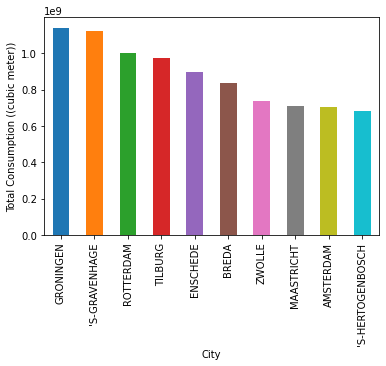

In [18]:
l2=[]
l2.append(df_stedin_gas)
l2.append(df_liander_gas)
l2.append(df_enexis_gas)
df_gas_all=pd.concat(l2)
plt.figure(figsize=(10,8))
plt.subplots()
df_all_gas_city=df_gas_all.groupby('city').sum()['annual_consume'].sort_values(ascending=False).head(10)
df_all_gas_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
#plt.title("Top Gas Consumption  for all Service Providers Combined (Enexis,Liander,Stedin) ")
plt.ylabel('Total Consumption ((cubic meter))')
plt.xlabel('City')

In [19]:
df_all_gas_city

city
GRONINGEN           1.141188e+09
'S-GRAVENHAGE       1.124238e+09
ROTTERDAM           1.000422e+09
TILBURG             9.724455e+08
ENSCHEDE            8.958539e+08
BREDA               8.389099e+08
ZWOLLE              7.359374e+08
MAASTRICHT          7.084924e+08
AMSTERDAM           7.034289e+08
'S-HERTOGENBOSCH    6.820088e+08
Name: annual_consume, dtype: float64

##  Top Cities based on usage of smart meter

In [20]:
df_enexis_elect_city=df_enexis_elect.groupby('zipcode_from').median()['smartmeter_perc'].sort_values(ascending=False).head(10)
df_liander_elect_city=df_liander_elect.groupby('city').median()['smartmeter_perc'].sort_values(ascending=False).head(10)
df_stedin_elect_city=df_stedin_elect.groupby('city').median()['smartmeter_perc'].sort_values(ascending=False).head(10)


In [21]:
df_stedin_elect_city

city
MEERSTAD                100.00
HEUKELOM                 95.45
URMOND                   93.00
NOORDEINDE GLD           92.86
SPRANG-CAPELLE           92.86
SON                      92.00
NIEUWLANDE COEVORDEN     91.67
AFFERDEN L               91.29
GEFFEN                   90.00
NULAND                   90.00
Name: smartmeter_perc, dtype: float64

Text(0.5, 0, 'City')

<Figure size 720x576 with 0 Axes>

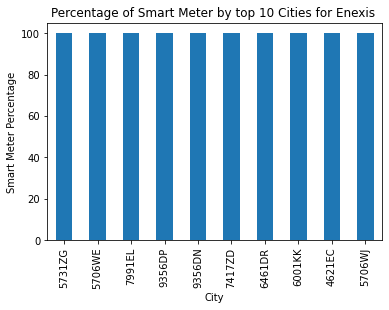

In [22]:
plt.figure(figsize=(10,8))
plt.subplots()
df_enexis_elect_city.plot(kind='bar')
plt.title("Percentage of Smart Meter by top 10 Cities for Enexis ")
plt.ylabel('Smart Meter Percentage')
plt.xlabel('City')

Text(0.5, 0, 'City')

<Figure size 720x576 with 0 Axes>

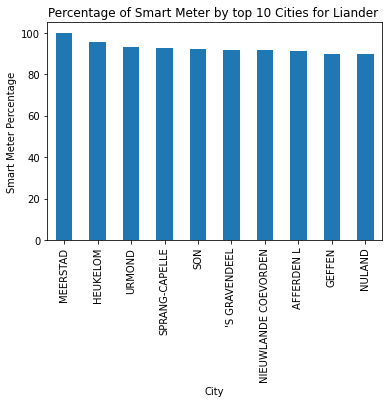

In [23]:
plt.figure(figsize=(10,8))
plt.subplots()
df_liander_elect_city.plot(kind='bar')
plt.title("Percentage of Smart Meter by top 10 Cities for Liander ")
plt.ylabel('Smart Meter Percentage')
plt.xlabel('City')

Text(0.5, 0, 'City')

<Figure size 720x576 with 0 Axes>

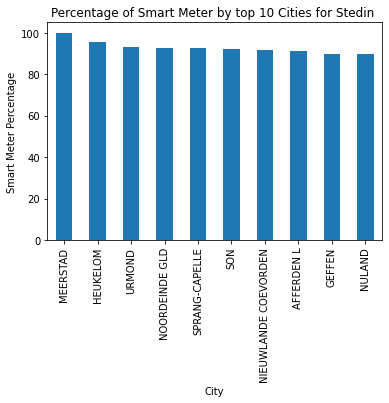

In [24]:

plt.figure(figsize=(10,8))
plt.subplots()
df_stedin_elect_city.plot(kind='bar')
plt.title("Percentage of Smart Meter by top 10 Cities for Stedin ")
plt.ylabel('Smart Meter Percentage')
plt.xlabel('City')

Text(0.5, 0, 'City')

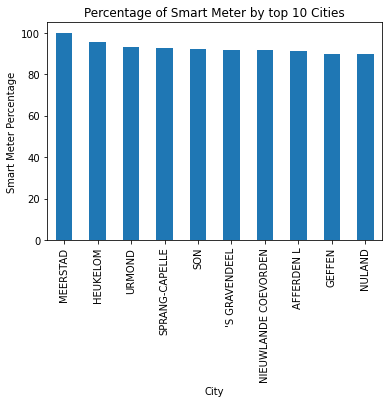

In [25]:
df_all_smart_meter_elect=df_electricity_all.groupby('city').median()['smartmeter_perc'].sort_values(ascending=False).head(10)
plt.subplots()
df_all_smart_meter_elect.plot(kind='bar')
plt.title("Percentage of Smart Meter by top 10 Cities")
plt.ylabel('Smart Meter Percentage')
plt.xlabel('City')

In [26]:
df_all_smart_meter_elect

city
MEERSTAD                100.00
HEUKELOM                 95.45
URMOND                   93.00
SPRANG-CAPELLE           92.86
SON                      92.00
'S GRAVENDEEL            91.67
NIEUWLANDE COEVORDEN     91.67
AFFERDEN L               91.29
GEFFEN                   90.00
NULAND                   90.00
Name: smartmeter_perc, dtype: float64

In [27]:
df_enexis_gas.isnull().sum()

net_manager                          0
purchase_area                        0
street                               0
zipcode_from                         0
zipcode_to                           0
city                                 0
delivery_perc                     1164
num_connections                      0
perc_of_active_connections           0
type_conn_perc                  297990
type_of_connection              298128
annual_consume                       0
annual_consume_lowtarif_perc         0
smartmeter_perc                 839547
serv_prov                            0
dtype: int64

In [28]:
df_enexis_gas_city=df_enexis_gas.dropna().groupby('city').median()['smartmeter_perc'].sort_values(ascending=False).head(10)
df_liander_gas_city=df_liander_gas.groupby('city').median()['smartmeter_perc'].sort_values(ascending=False).head(10)
df_stedin_gas_city=df_stedin_gas.groupby('city').median()['smartmeter_perc'].sort_values(ascending=False).head(10)
df_all_smart_meter_gas_city=df_gas_all.groupby('city').median()['smartmeter_perc'].sort_values(ascending=False).head(10)

In [29]:
print(df_all_smart_meter_gas_city)

city
MEERSTAD                100.00
HEUKELOM                 95.45
URMOND                   93.00
SPRANG-CAPELLE           92.86
SON                      92.00
'S GRAVENDEEL            91.67
NIEUWLANDE COEVORDEN     91.67
AFFERDEN L               91.29
GEFFEN                   90.00
NULAND                   90.00
Name: smartmeter_perc, dtype: float64


Text(0.5, 0, 'City')

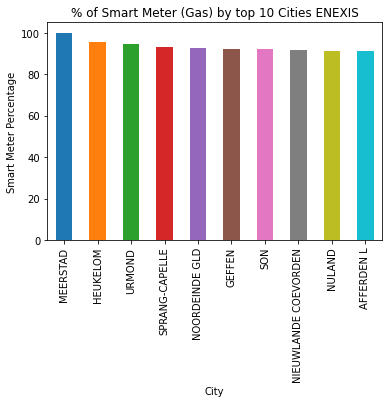

In [30]:
plt.subplots()
df_enexis_gas_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("% of Smart Meter (Gas) by top 10 Cities ENEXIS")
plt.ylabel('Smart Meter Percentage')
plt.xlabel('City')

Text(0.5, 0, 'City')

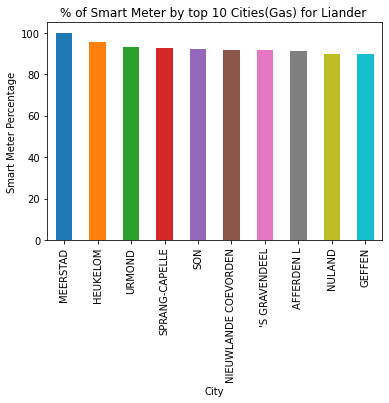

In [31]:
df_liander_gas_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("% of Smart Meter by top 10 Cities(Gas) for Liander ")
plt.ylabel('Smart Meter Percentage')
plt.xlabel('City')

Text(0.5, 0, 'City')

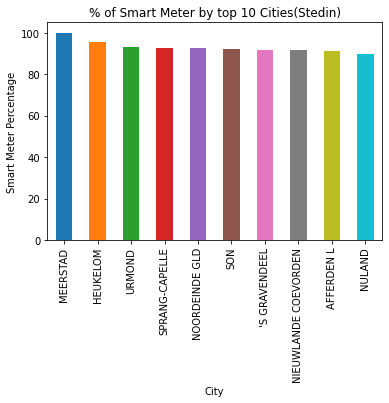

In [32]:
plt.subplots()
df_stedin_gas_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("% of Smart Meter by top 10 Cities(Stedin)")
plt.ylabel('Smart Meter Percentage')
plt.xlabel('City')

Text(0.5, 0, 'City')

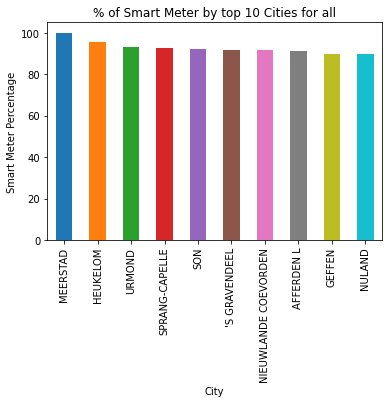

In [33]:
df_all_smart_meter_gas_city.plot(kind='bar',color=mcolors.TABLEAU_COLORS)
plt.title("% of Smart Meter by top 10 Cities for all")
plt.ylabel('Smart Meter Percentage')
plt.xlabel('City')

### Comparison of Energy during regular tariff hours and low tariff hours

In [34]:
df_enexis_elect['low_tarif_anl_consume']=df_enexis_elect['annual_consume_lowtarif_perc']*df_enexis_elect['annual_consume']/100
df_enexis_elect['regular_tarif_consume']=df_enexis_elect['annual_consume']-df_enexis_elect['low_tarif_anl_consume']
df_liander_elect['low_tarif_anl_consume']=df_liander_elect['annual_consume_lowtarif_perc']*df_liander_elect['annual_consume']/100
df_liander_elect['regular_tarif_consume']=df_liander_elect['annual_consume']-df_liander_elect['low_tarif_anl_consume']
df_stedin_elect['low_tarif_anl_consume']=df_stedin_elect['annual_consume_lowtarif_perc']*df_stedin_elect['annual_consume']/100
df_stedin_elect['regular_tarif_consume']=df_stedin_elect['annual_consume']-df_stedin_elect['low_tarif_anl_consume']
df_electricity_all['low_tarif_anl_consume']=df_electricity_all['annual_consume_lowtarif_perc']*df_electricity_all['annual_consume']/100
df_electricity_all['regular_tarif_consume']=df_electricity_all['annual_consume']-df_electricity_all['low_tarif_anl_consume'] 
                                                                                                    



In [35]:
df_gas_all['low_tarif_anl_consume']=df_gas_all['annual_consume_lowtarif_perc']*df_gas_all['annual_consume']/100
df_gas_all['regular_tarif_consume']=df_gas_all['annual_consume']-df_gas_all['low_tarif_anl_consume']  


In [36]:
df_val1=df_enexis_elect.groupby('net_manager').sum()[['regular_tarif_consume','low_tarif_anl_consume']]
df_val2=df_liander_elect.dropna().groupby('net_manager').sum()[['regular_tarif_consume','low_tarif_anl_consume']]
df_val3=df_stedin_elect.groupby('net_manager').sum()[['regular_tarif_consume','low_tarif_anl_consume']]
df_val4=df_electricity_all.groupby('net_manager').sum()[['regular_tarif_consume','low_tarif_anl_consume']]


In [37]:
df_val4=df_electricity_all.groupby('serv_prov').sum()[['regular_tarif_consume','low_tarif_anl_consume']] 


In [38]:
df_gas_tariff=df_gas_all.groupby('serv_prov').sum()[['regular_tarif_consume','low_tarif_anl_consume']]

In [39]:
df_gas_tariff

,regular_tarif_consume,low_tarif_anl_consume
serv_prov,,
Enexis,8.307894e+09,4.147025e+09
Liander,1.487179e+10,1.030119e+10
Stedin,1.029375e+10,7.016560e+09


In [40]:
df_val4['perc_reg']=100*df_val4['regular_tarif_consume']/(df_val4['regular_tarif_consume']+df_val4['low_tarif_anl_consume'])
df_val4['perc_low']=100-df_val4['perc_reg']
df_gas_tariff['perc_reg']=100*df_gas_tariff['regular_tarif_consume']/(df_gas_tariff['regular_tarif_consume']+df_gas_tariff['low_tarif_anl_consume'])
df_gas_tariff['perc_low']=100-df_gas_tariff['perc_reg']

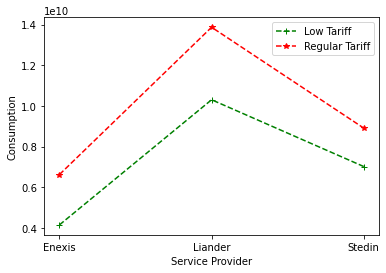

In [41]:
#plt.plot([df_val1['regular_tarif_consume'],df_val2['regular_tarif_consume']])
plt.plot(df_val4['low_tarif_anl_consume'],marker='+',color='green',linestyle='dashed',label='Low Tariff')
plt.plot(df_val4['regular_tarif_consume'],marker='*',color='red',linestyle='dashed',label='Regular Tariff')
plt.xlabel('Service Provider')
plt.ylabel('Consumption')
plt.legend()

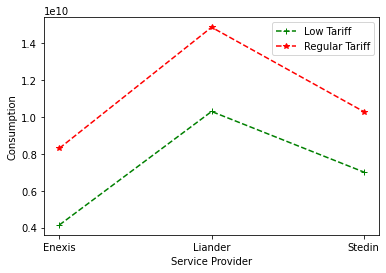

In [42]:
plt.plot(df_gas_tariff['low_tarif_anl_consume'],marker='+',color='green',linestyle='dashed',label='Low Tariff')
plt.plot(df_gas_tariff['regular_tarif_consume'],marker='*',color='red',linestyle='dashed',label='Regular Tariff')
plt.xlabel('Service Provider')
plt.ylabel('Consumption')
plt.legend()

In [43]:
df_val4

,regular_tarif_consume,low_tarif_anl_consume,perc_reg,perc_low
serv_prov,,,,
Enexis,6.622522e+09,4.146950e+09,61.493470,38.506530
Liander,1.386704e+10,1.030119e+10,57.377154,42.622846
Stedin,8.907105e+09,7.016560e+09,55.936275,44.063725
